# Central Pattern Generator model for quadruped locomotion

Computational model of a Central Pattern Generator (CPG) using 8 coupled neurons based on the Morris-Lecar model.

[1] Buono L and Golubitsky M, "Models of central pattern generators for quadruped locomotion I. Primary Gaits". J. Math. Biol. 42, 291--326 (2001)  
[2] Buono L and Golubitsky M, "Models of central pattern generators for quadruped locomotion II. Secondary Gaits". J. Math. Biol. 42, 327--346 (2001)  
[3] Morris C and Lecar H, "Voltage oscillations in the barnacle giant muscle fiber". Biophys. J. 35, 193--213 (1981)


## Theory
The original Morris-Lecar model aimed at reproducing action potentials and excitability patterns observed experimentally in the giant muscle fiber of the barnacle (*balanus nubilus*).  

<img src="img/256px-Balanus_nubilus.png" width=256 style="float:center">https://commons.wikimedia.org/wiki/File:Balanus_nubilus_(3484682809).jpg</img>

The model contains Ca<sup>2+</sup>, K<sup>+</sup> and leak currents. The depolarization component of the Morris-Lecar action potential is mediated by a Ca<sup>2+</sup> current. The other standard model of action potentials is the Hodgkin-Huxley model and contains Na<sup>+</sup> and K<sup>+</sup> currents, using experimentally derived Na<sup>+</sup> and K<sup>+</sup> channel activation and inactivation gate dynamics as a function of voltage. 

The Morris-Lecar model is based on this scheme of the membrane as a circuit:

<img src="img/ML_circuit.png" width=250>

The Morris-Lecar model contains two variables:
1. $V$: is the potential difference (voltage) across the membrane, its change depends on the membrane capacitance $C$ and three currents:  
    a) Ca<sup>2+</sup> current: $-g_{Ca} \: m_{\infty}(V) \: (V-V_{Ca})$, where $m_{\infty}(V)$ is the steady-state fraction of open Ca<sup>2+</sup> channels at voltage $V$  
    b) K<sup>+</sup> current: $-g_{K} w (V-V_{K})$, which depends on the second variable $w$ (fraction of open K<sup>+</sup> channels)  
    c) leak current: $-g_{L} (V-V_{L})$  
    d) an external current (controlled by the experimenter): $I(t)$  
2. $w$: is the fraction of open K<sup>+</sup> channels ($w \in [0,1]$) at a given voltage $V$  

Actually, both variables $V$ and $w$ vary over time and should be written $V(t)$ and $w(t)$. The dynamical behaviour of the system is represented by two coupled ordinary differential equations (ODEs):

$$
C \: \frac{dV}{dt} = -g_{Ca} \: m_{\infty}(V) \: (V-V_{Ca}) -g_{K} w (V-V_{K}) -g_{L} (V-V_{L}) + I(t) \\
\frac{dw}{dt} = \lambda_w(V) \: \left( w_{\infty}(V)-w \right) 
$$

and the auxiliary functions

$$
m_{\infty}(V) = \frac{1}{2} \left( 1 + \tanh \left( \frac{V-V_1}{V_2} \right) \right) \\
w_{\infty}(V) = \frac{1}{2} \left( 1 + \tanh \left( \frac{V-V_3}{V_4} \right) \right) \\
\lambda_w(V) = \phi \: \cosh \left( \frac{V-V_3}{2 V_4} \right) 
$$

- $m_{\infty}(V)$ is the steady-state fraction of open Ca<sup>2+</sup> channels at voltage $V$  
- $w_{\infty}(V)$ is the steady-state fraction of open K<sup>+</sup> channels at voltage $V$
- $\lambda_w(V)$ is the rate at which $w$ approaches its equilibrium value $w_{\infty}(V)$ at voltage $V$


In [1]:
from cpg_quad import *

## The Morris-Lecar model

In [2]:
dt = 0.05 # sampling/integration interval

### Single current pulse experiment 1

Try different current amplitudes and durations.  

**Observations:**
1. threshold behaviour
2. graded responses
3. repeated spiking

t=19900/20000


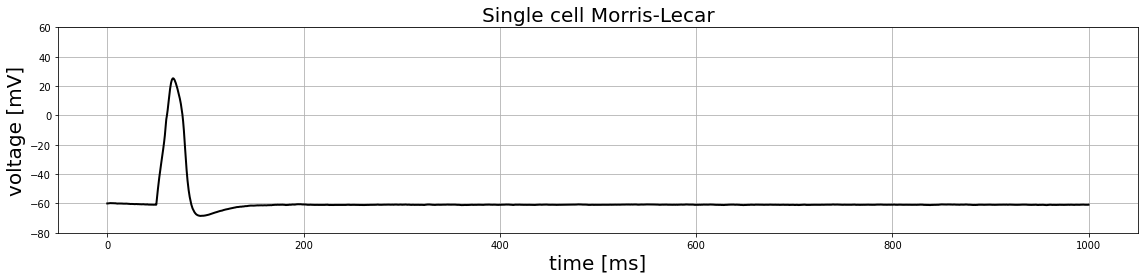

In [3]:
T = 1000
I0 = 140
t_on, t_off = 50, 60
i_on, i_off = int(t_on/dt), int(t_off/dt)
I_ext = np.zeros(int(T/dt))
I_ext[i_on:i_off] = I0
params = {'T': 1000, 'dt': dt, 'sd': 0.05, 'I_ext': I_ext, 'doplot': True}
X, Y = ml1(**params)

### Single current pulse experiment 2

Try different hyperpolarizing currents and check if you can produce *anodal break*.

**Explanation:**  
Compare with the Hodgkin-Huxley model. What role does the Na+ channel inactivation gate play?

t=19900/20000


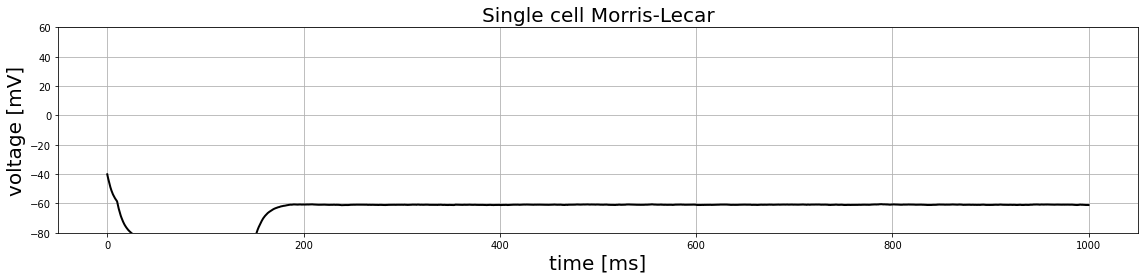

In [38]:
# anodal break possible?
T = 1000
I0 = -50
t_on, t_off = 10, 150
i_on, i_off = int(t_on/dt), int(t_off/dt)
I_ext = np.zeros(int(T/dt))
I_ext[i_on:i_off] = I0
params = {'T': T, 'dt': dt, 'sd': 0.05, 'v0': -40, 'w0': 0.1, 'I_ext': I_ext, 'doplot': True}
X, Y = ml1(**params)

### Double current pulse experiment 1

Try different current amplitudes to observe threshold behaviour.

t=19900/20000


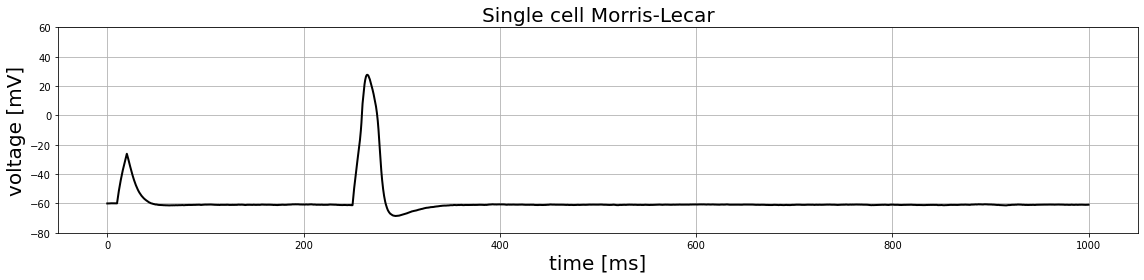

In [5]:
T = 1000
I0 = 100
I1 = 150
t_on_0, t_off_0 = 10, 20
t_on_1, t_off_1 = 250, 260
i_on_0, i_off_0 = int(t_on_0/dt), int(t_off_0/dt)
i_on_1, i_off_1 = int(t_on_1/dt), int(t_off_1/dt)
I_ext = np.zeros(int(T/dt))
I_ext[i_on_0:i_off_0] = I0
I_ext[i_on_1:i_off_1] = I1
params = {'T': T, 'dt': dt, 'sd': 0.05, 'I_ext': I_ext, 'doplot': True}
X, Y = ml1(**params)

### Double current pulse experiment 2

Try different inter-stimulus intervals to observe refractory behaviour.

t=9900/10000


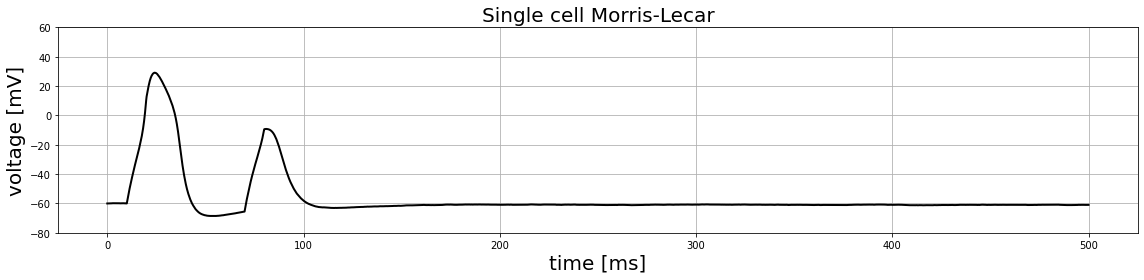

In [6]:
T = 500
I0 = 150
I1 = 150
t_on_0, t_off_0 = 10, 20
t_on_1, t_off_1 = 70, 80
i_on_0, i_off_0 = int(t_on_0/dt), int(t_off_0/dt)
i_on_1, i_off_1 = int(t_on_1/dt), int(t_off_1/dt)
I_ext = np.zeros(int(T/dt))
I_ext[i_on_0:i_off_0] = I0
I_ext[i_on_1:i_off_1] = I1
params = {'T': T, 'dt': dt, 'sd': 0.05, 'I_ext': I_ext, 'doplot': True}
X, Y = ml1(**params)

### Phase-plane visualization

#### Nullclines and fixed points
Setting $\frac{dV}{dt}=0$ and $\frac{dw}{dt}=0$, solving for $w$ gives two functions $w_0(V)$ and $w_1(V)$, the so-called nullclines. Along these lines, one of the two coupled equations is zeros, i.e. the corresponding variable ($V,w$) does not change.  

**V-nullcline:**  
The V-nullcline is defined by $\frac{dV}{dt}=0$, so:

$$
w_0(V) = \frac{-g_{Ca} m_{\infty}(V) (V-V_{Ca}) -g_{L} (V-V_{L}) + I(t)}{-g_{K} (V-V_{K})}
$$

or, using the explicit expression for $m_{\infty}(V)$:

$$
w_0(V) = \frac{-g_{Ca} \frac{1}{2} \left( 1 + \mathrm{tanh} \frac{V-V_1}{V_2} \right) (V-V_{Ca}) -g_{L} (V-V_{L}) + I(t)}{-g_{K} (V-V_{K})}
$$

**w-nullcline:**  
For $\frac{dw}{dt}=0$, we have to solve $0 = \lambda_w(v) \left( w_{\infty}(V)-w \right)$. Now, $\lambda_w(v) > 0$, because $\lambda_w(v) = \phi \: \cosh \left( \frac{V-V_3}{2 V_4} \right)$, and $\phi > 0$ as well as $\cosh(x) = \frac{\mathrm{e}^x - \mathrm{e}^{-x}}{2} \ge 1$. It is therefore sufficient to solve $0=w_{\infty}(V)-w$, or:

$$
w_1(V) = \frac{1}{2} \left( 1 + \mathrm{tanh} \frac{V-V_3}{V_4} \right)
$$.

To understand the system's dynamical behaviour, it is a common approach to plot the nullclines into a $V,w$ coordinate system, along with the vector field defined by the dynamical equations $\left( \frac{dV}{dt}, \frac{dw}{dt} \right)$. The plot below corresponds to a constant external current $I(t)=50$. Note that the shape of the $\frac{dV}{dt}=0$ nullcline changes with the magnitude of the applied current $I(t)$.

<img src="img/py_nullclines.png" width=450>

**How to read phase-plane plots:**
1. Nullclines indicate where the derivatives $\frac{dV}{dt}$ and $\frac{dw}{dt}$ change their sign. The sign of $\frac{dV}{dt}$ above the V-nullcline (solid black line) is opposite to the sign below the line, and the sign of $\frac{dw}{dt}$ changes when crossing the w-nullcline (dashed).
2. The streamlines tell us which sign the derivatives have, and in which way a system will change when placed anywhere in the $V,w$-plane. $V$ runs along the x-axis: all points above the V-nullcline will flow to the left, while points below the V-nullcline will drift to the right. $w$ runs along the y-axis: points above the w-nullcline will be pushed downwards, points below the w-nullcline will move upwards.
3. An intersection of the nullclines defines a system's *fixed point* $(V^{*},w^{*})$. If the system reaches this point, it will not change further (if there are no random fluctuations).
4. If the system is started at any given point (state) $(V,w)$, the dynamical behaviour can be predicted by following the streamlines. In the plot above, any starting point will spiral down towards the fixed point, where it will remain. In the time domain, $V(t)$ would show a damped oscillation and then reach an equilibrium voltage as defined by the $V$-coordinate of the fixed point ($V^{*}$), a little bit on the negative side of -40 mV.

### Continuous current experiment 1 (sub-threshold)

This experiment illustrates the prediction derived above, for a constant current $I(t)=50$.  
``` python
T = 500
I_ext = 50*np.ones(int(T/dt))
params = {'T': T, 'dt': dt, 'sd': 0.05, 'I_ext': I_ext, 'v0': 40, 'w0': 0.5, 'doplot': True}
X, Y = ml1(**params)
```

t=9900/10000


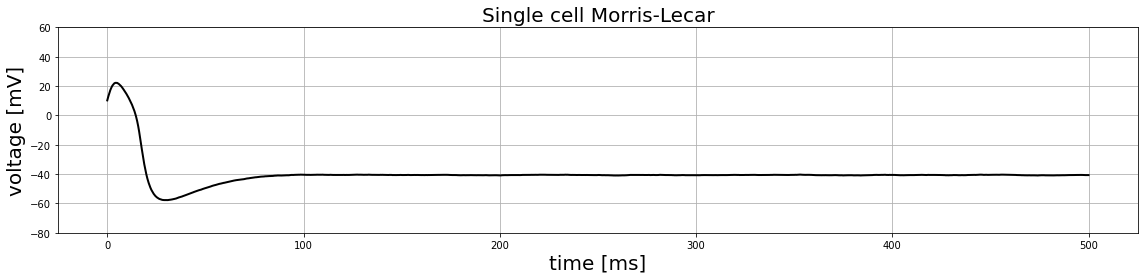

In [7]:
T = 500
I_ext = 50*np.ones(int(T/dt))
params = {'T': T, 'dt': dt, 'sd': 0.05, 'I_ext': I_ext, 'v0': 10, 'w0': 0.2, 'doplot': True}
X, Y = ml1(**params)

In [8]:
p2 = {'I_ext': I_ext[0]}
fp_stability(**p2)

Fixed point: v = -40.480, w = 0.055
Jacobian eigenvalues: l0 = 0.5074, l1 = 0.1140


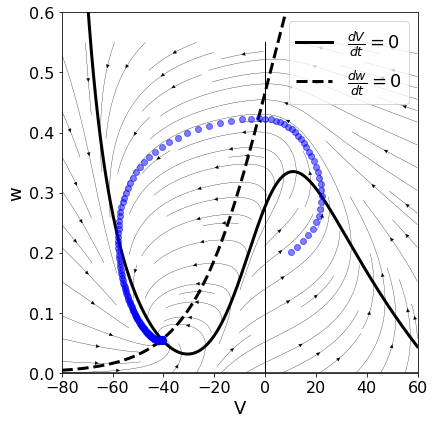

In [9]:
phase_plane(v=X, w=Y, **params)

**Exercise:** Repeat the simulation for different starting points, by varying the initial values `v0` and `w0` in the parameter dictionary `params`.

### Continuous current experiment 2 (supra-threshold)

``` python
T = 1000
I_ext = 100*np.ones(int(T/dt))
params = {'T': T, 'dt': dt, 'sd': 0.05, 'I_ext': I_ext, 'v0': 30, 'w0': 0.05, 'doplot': True}
X, Y = ml1(**params)
```

t=19900/20000


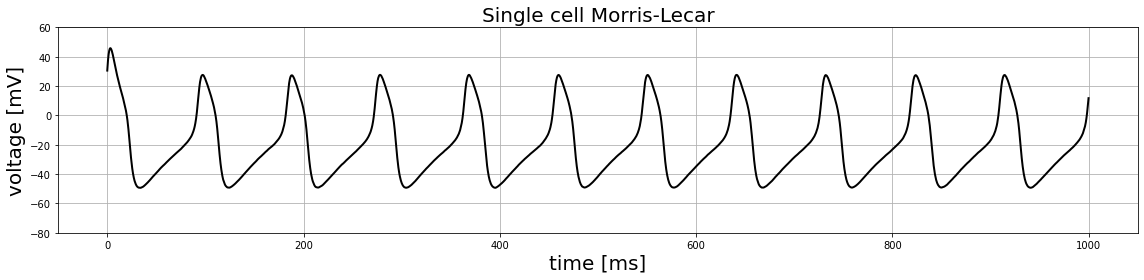

In [10]:
T = 1000
I_ext = 100*np.ones(int(T/dt))
params = {'T': T, 'dt': dt, 'sd': 0.05, 'I_ext': I_ext, 'v0': 30, 'w0': 0.05, 'doplot': True}
X, Y = ml1(**params)

### Phase-plane visualization

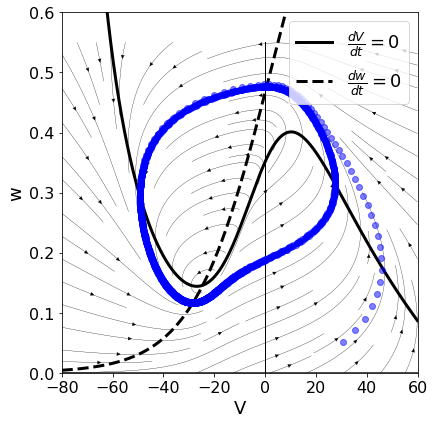

In [11]:
phase_plane(v=X, w=Y, **params)

In [12]:
p2 = {'I_ext': I_ext[0]}
fp_stability(**p2)

Fixed point: v = -24.505, w = 0.146
Jacobian eigenvalues: l0 = 3.5085, l1 = 0.0294


### Continuous current experiment 3 (a larger supra-threshold current)

``` python
T = 1000
I_ext = 150*np.ones(int(T/dt))
params = {'T': T, 'dt': dt, 'sd': 0.05, 'I_ext': I_ext, 'doplot': True}
X, Y = ml1(**params)
```

t=19900/20000


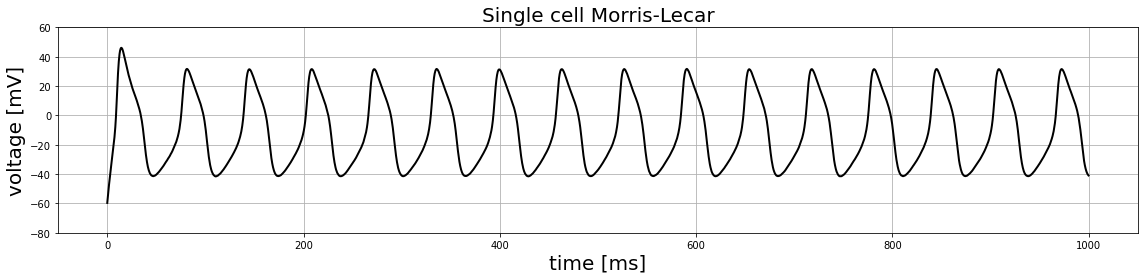

In [13]:
T = 1000
I_ext = 150*np.ones(int(T/dt))
params = {'T': T, 'dt': dt, 'sd': 0.05, 'I_ext': I_ext, 'doplot': True}
X, Y = ml1(**params)

### Phase-plane visualization

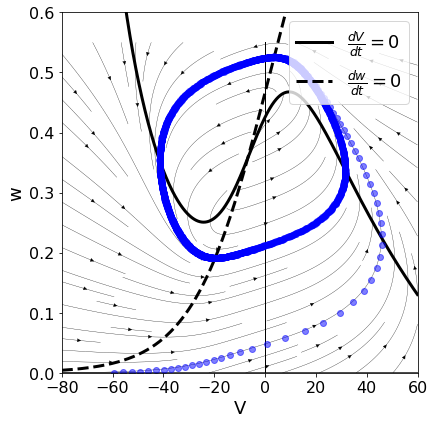

In [14]:
phase_plane(v=X, w=Y, **params)

In [15]:
p2 = {'I_ext': I_ext[0]}
fp_stability(**p2)

Fixed point: v = -6.707, w = 0.358
Jacobian eigenvalues: l0 = 11.1902, l1 = 0.0108


### Current ramp experiment 1 (from sub- to supra-threshold)

Onset of oscillations.

``` python
T = 1000
I_ext = np.linspace(90, 120, int(T/dt))
params = {'T': T, 'dt': dt, 'sd': 0.1, 'I_ext': I_ext, 'v0':-20, 'w0':0.13, 'doplot': True}
X, Y = ml1(**params)
```

t=19900/20000


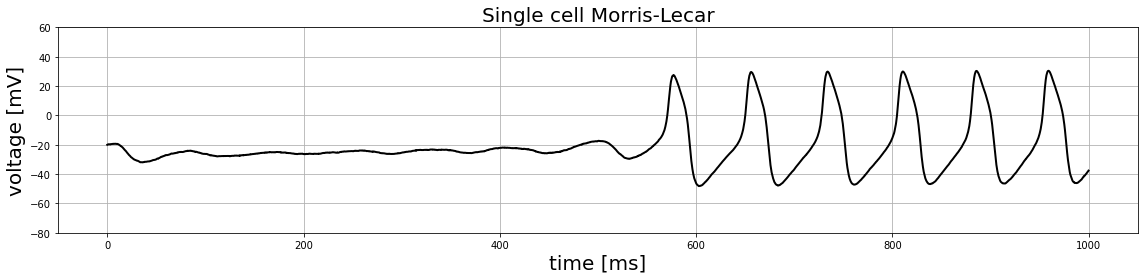

In [16]:
T = 1000
I_ext = np.linspace(90, 120, int(T/dt))
params = {'T': T, 'dt': dt, 'sd': 0.1, 'I_ext': I_ext, 'v0':-20, 'w0':0.13, 'doplot': True}
X, Y = ml1(**params)

### Current ramp experiment 2 (from supra- to sub-threshold)

End of oscillations.

``` python
T = 1000
I_ext = np.linspace(200, 300, int(T/dt))
params = {'T': T, 'dt': dt, 'sd': 0.1, 'I_ext': I_ext, 'doplot': True}
X, Y = ml1(**params)
```

t=19900/20000


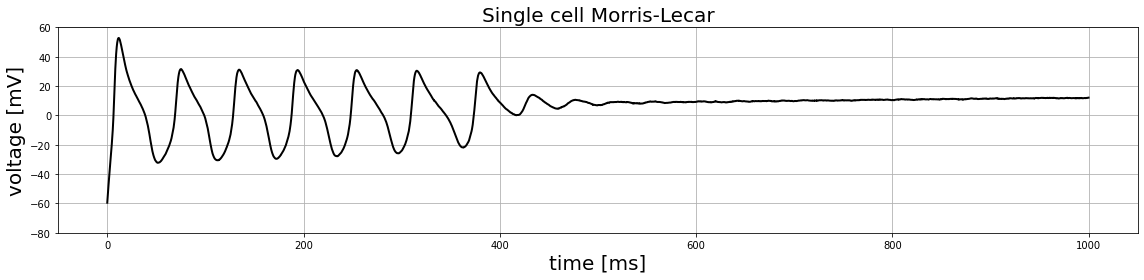

In [17]:
T = 1000
I_ext = np.linspace(200, 300, int(T/dt))
params = {'T': T, 'dt': dt, 'sd': 0.1, 'I_ext': I_ext, 'doplot': True}
X, Y = ml1(**params)

## Some experiments from the original Morris-Lecar paper

``` python
T = 500
sd = 0.1
I0 = 70
I1 = 95.1
I2 = 100
I3 = 240
I4 = 250
```

t=9900/10000
t=9900/10000
t=9900/10000
t=9900/10000
t=9900/10000


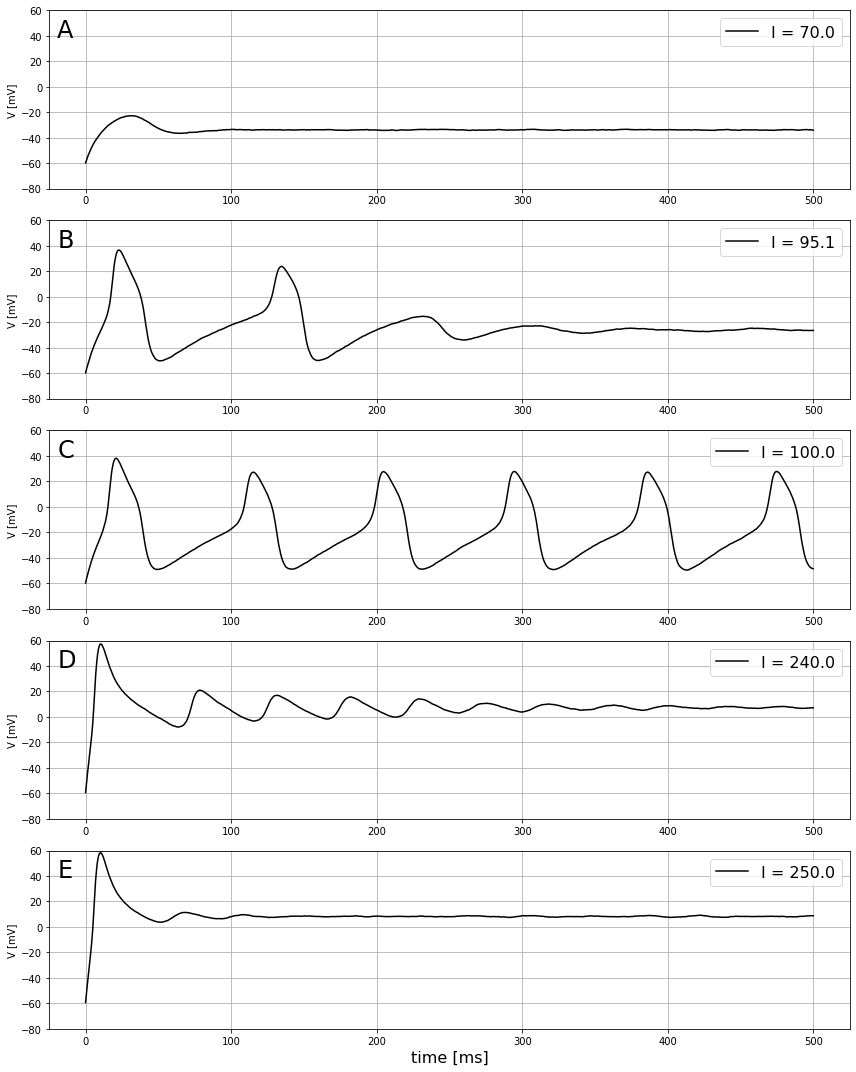

In [18]:
# gL=2, gCa=4, gK=8, VL=-50, VCa=100, VK=-70, lambdaM=0.1, lambdaN=1/15
# V1=10, V2=-15, V3=-1, V4=14.5, C=20
# I = 100, 200, 300, 400, 500
T = 500
sd = 0.1
I0 = 70
I1 = 95.1
I2 = 100
I3 = 240
I4 = 250
params0 = {'T': T, 'dt': dt, 'sd': sd, 'I_ext': I0*np.ones(int(T/dt))}
X0, _ = ml1(**params0)
params1 = {'T': T, 'dt': dt, 'sd': sd, 'I_ext': I1*np.ones(int(T/dt))}
X1, _ = ml1(**params1)
params2 = {'T': T, 'dt': dt, 'sd': sd, 'I_ext': I2*np.ones(int(T/dt))}
X2, _ = ml1(**params2)
params3 = {'T': T, 'dt': dt, 'sd': sd, 'I_ext': I3*np.ones(int(T/dt))}
X3, _ = ml1(**params3)
params4 = {'T': T, 'dt': dt, 'sd': sd, 'I_ext': I4*np.ones(int(T/dt))}
X4, _ = ml1(**params4)

time = dt*np.arange(int(T/dt))
fig, ax = plt.subplots(5, 1, figsize=(12,15))
ax[0].plot(time, X0, '-k', label=f"I = {I0:.1f}")
ax[1].plot(time, X1, '-k', label=f"I = {I1:.1f}")
ax[2].plot(time, X2, '-k', label=f"I = {I2:.1f}")
ax[3].plot(time, X3, '-k', label=f"I = {I3:.1f}")
ax[4].plot(time, X4, '-k', label=f"I = {I4:.1f}")
for i in range(5):
    ax[i].annotate(chr(65+i), xy=(0.01,0.85), xycoords='axes fraction', fontsize=24) # A, B,...
    ax[i].legend(loc=1, fontsize=16)
    ax[i].grid()
    ax[i].set_ylabel("V [mV]")
    ax[i].set_ylim(-80,60)
ax[4].set_xlabel("time [ms]", fontsize=16)
plt.tight_layout()
plt.show()

In [19]:
p0 = {'I_ext': I0}
fp_stability(**p0)

p1 = {'I_ext': I1}
fp_stability(**p1)

p2 = {'I_ext': I2}
fp_stability(**p2)

p3 = {'I_ext': I3}
fp_stability(**p3)

p4 = {'I_ext': I4}
fp_stability(**p4)

Fixed point: v = -33.754, w = 0.084
Jacobian eigenvalues: l0 = 1.3209, l1 = 0.0598
Fixed point: v = -25.906, w = 0.134
Jacobian eigenvalues: l0 = 3.0676, l1 = 0.0327
Fixed point: v = -24.505, w = 0.146
Jacobian eigenvalues: l0 = 3.5085, l1 = 0.0294
Fixed point: v = 7.447, w = 0.589
Jacobian eigenvalues: l0 = 8.4467, l1 = 0.0436
Fixed point: v = 8.288, w = 0.602
Jacobian eigenvalues: l0 = 7.9852, l1 = 0.0483


*Question:* What did you observe?  
*Answer:* a bifurcation, more specifically, two bifurcations

<img src="img/bifurcation_diagram.png" width=800>

**Summary:**
1. excitable system, threshold and non-linear (AP) behaviour
2. continuous current injection can cause oscillations of the membrane potential (Hopf bifurcation)

## Oscillator types

1. type I oscillators
2. type Ib oscillators
3. type II oscillators

parameters from [Ermentrout](http://www.math.pitt.edu/~bard/classes/compneuro/model/ml.ode)

t=41900/42000


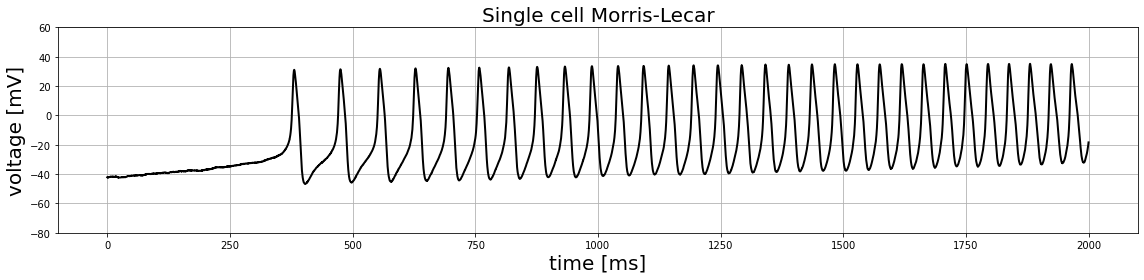

In [51]:
# typeI: V3, V4, phi, gCa = 12, 17.4, 1/15, 4 (I0 = 50 ... 150)
T = 2000
I_ext = np.linspace(30, 100, int(T/dt))
params = {'T': T, 'dt': dt, 'n0': 2000, 'sd': 0.1, 'I_ext': I_ext, 'v0':-16, 'w0':0.014915, 
          'V1': -1.2, 'V2': 18, 'V3': 12, 'V4': 17.4, 'phi': 1/15, 'gCa': 4, 'VK': -84, 'VL': -60, 
          'VCa': 120, 'gK': 8, 'gL': 2, 'C': 20, 'doplot': True}
X, Y = ml1(**params)

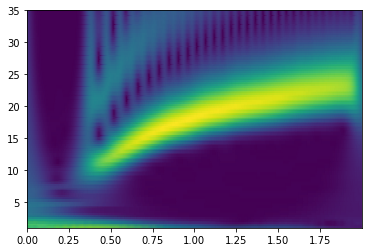

In [52]:
# type1 spectrogram
spectrogram(X, fs=1000/dt, f_min=1, f_max=35, n_freq=50)

t=41900/42000


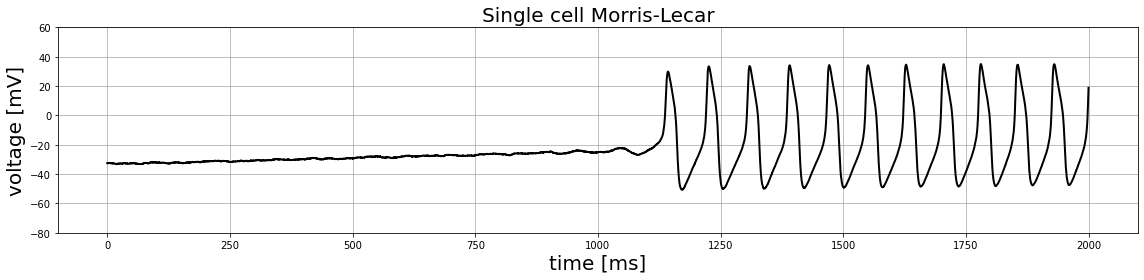

In [29]:
# typeII: V3, V4, phi, gCa = 2, 30, 0.04, 4.4
T = 2000
I_ext = np.linspace(70, 120, int(T/dt))
params = {'T': T, 'dt': dt, 'n0': 2000, 'sd': 0.1, 'I_ext': I_ext, 'v0':-16, 'w0':0.014915, 
          'V1': -1.2, 'V2': 18, 'V3': 2, 'V4': 30, 'phi': 0.04, 'gCa': 4.4, 'VK': -84, 'VL': -60, 
          'VCa': 120, 'gK': 8, 'gL': 2, 'C': 20, 'doplot': True}

X, Y = ml1(**params)

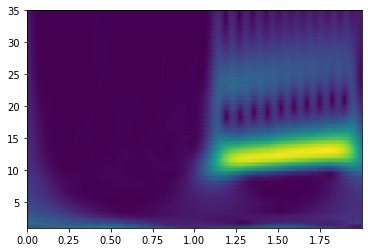

In [30]:
# type2 spectrogram
spectrogram(X, fs=1000/dt, f_min=1, f_max=35, n_freq=50)

In [ ]:
# typeIb: V3, V4, phi, gCa = 12, 17.4, 0.23, 4 (I0 = 30 ... 60)
T = 1000
I0 = 37
I_ext = I0*np.ones(int(T/dt))
#I_ext = np.linspace(20, 30, int(T/dt))
params = {'T': T, 'dt': dt, 'sd': 1.0, 'I_ext': I_ext, 'v0':-16, 'w0':0.014915, 
          'V1': -1.2, 'V2': 18, 'V3': 12, 'V4': 17.4, 'phi': 0.23, 'gCa': 4, 'VK': -84, 'VL': -60, 
          'VCa': 120, 'gK': 8, 'gL': 2, 'C': 20, 'doplot': True}
X, Y = ml1(**params)
# par4-6 V3=12, V4=17.4, phi=.06666667, gca=4
# par7-8 V3=12, V4=17.4, phi=.23, gca=4
# param s1=0, s2=0, t1=50, t2=55, t3=500, t4=550


## Type-1 and Type-2 oscillators

These observations can be tested with a series of experiments performed with constant input currents $I_{ext}$. 
Both oscillator types start to spike regularly beyond a certain stimulation current.

**Type-1**  
Type-1 oscillators can produce different oscillation frequencies. At lower stimulation currents, the frequency is low, and faster oscillations occur at larger currents.

<img src="img/Type1_oscillator.png" width=400>

**Type-2**  
Type-2 oscillators *jump* to a certain frequency when a threshold current is reached. Lower frequencies (near zero) cannot be produced by varying the stimulation current.

<img src="img/Type2_oscillator.png" width=400>

Morris-Lecar dynamics can produce both behaviours.  
Common parameters: `V1=-1.2, V2=18, gK=8, gL=2, VCa=120, VK=-84, VL=-60, C=20`  
Differences between type1 and type2 parameters:  
- type-1: `V3=12, V4=17.4, phi=1/15, gCa=4`
- type-2: `V3=2, V4=30, phi=0.04, gCa=4.4`

The Figures above can be reproduced with the function `oscillator_types(mode="type1")` in the main script `cpg_quad.py`.

In [ ]:
# Longtin Type II
dt = 0.01
T = 1000
I0 = 0.1
I_ext = I0*np.ones(int(T/dt))
#I_ext = np.linspace(20, 30, int(T/dt))
params = {'T': T, 'dt': dt, 'sd': 1.0, 'I_ext': I_ext, 'v0':-16, 'w0':0.014915, 
          'V1': -0.01, 'V2': 0.15, 'V3': 0.1, 'V4': 0.145, 
          'VCa': 1.0, 'VK': -0.7, 'VL': -0.5, 'gCa': 1.0, 'gK': 2.0, 'gL': 0.5, 'C': 1.0, 'phi': 1/3, 
          'doplot': True}
#X, Y = ml1(**params)

In [ ]:
T = 1000
I0 = 37
I_ext = I0*np.ones(int(T/dt))
#I_ext = np.linspace(20, 30, int(T/dt))
params = {'T': T, 'dt': dt, 'sd': 1.0, 'I_ext': I_ext, 'v0':0.0, 'w0':0.0, 
          'V1': -0.01, 'V2': 0.15, 'V3': 0.0167, 'V4': 0.25, 
          'VCa': 1.7, 'VK': -0.7, 'VL': -0.5, 'gCa': 1.1, 'gK': 2.0, 'gL': 0.5, 'C': 1.0, 'phi': 0.2, 
          'doplot': True}
#X, Y = ml1(**params)

## Two coupled Morris-Lecar neurons

Now that we have a basic understanding of what the model is capable of, let's turn to the smallest possible network: 2 coupled Morris-Lecar neurons.

### Excitatory coupling

The two cells are connected via mutually *excitatory* coupling.  
<img src="img/coupling_pos.png" width=300>

### Inhibitory coupling

The two cells are connected via mutually *inhibitory* coupling, for instance via inhibitory interneurons.
<img src="img/coupling_neg.png" width=300>

### Mutually excitatory coupling: in-phase spiking

``` python
dt = 0.05
X0, Y0, X1, Y1 = ml2(T=1000, dt=dt, sd=0.1, I0=90, I1=120, coupling='mode-B')
```

t=21900/22000


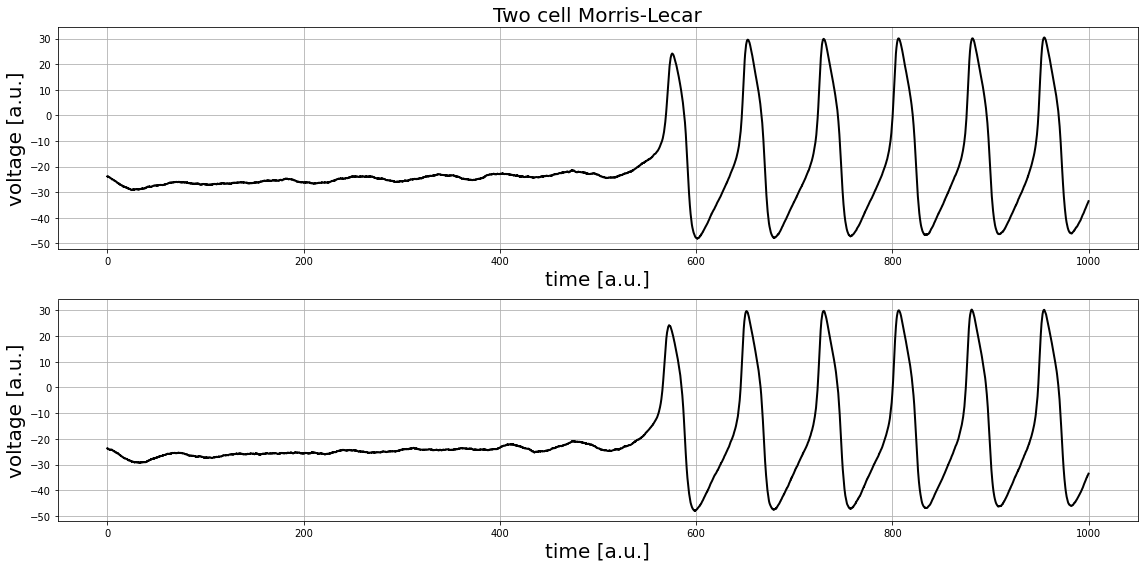

In [8]:
from cpg_quad import *
T = 1000
dt = 0.05
I_ext = np.linspace(90, 120, int(T/dt))
X0, Y0, X1, Y1 = ml2(T=T, dt=dt, n0=2000, sd=0.1, I_ext=I_ext, coupling='mode-A', doplot=True)

### Cross-correlation

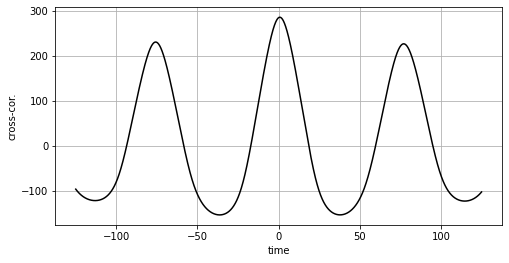

In [9]:
lags, cc = ccov(X0, X1, lmax=2500)
plt.figure(figsize=(8,4))
plt.plot(dt*lags, cc, '-k')
plt.xlabel("time")
plt.ylabel("cross-cor.")
plt.grid()
plt.show()

### Mutually excitatory coupling: out-of-phase spiking

``` python
X0, Y0, X1, Y1 = ml2(T=1000, dt=dt, sd=0.1, I0=90, I1=120, coupling='mode-A')
```

t=21900/22000


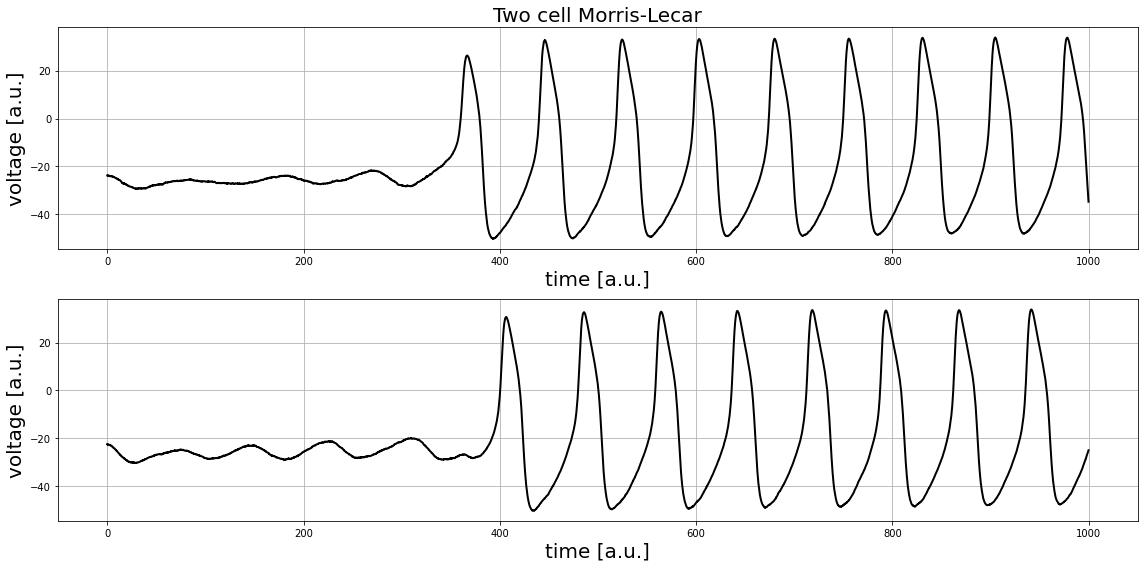

In [12]:
from cpg_quad import *
T = 1000
dt = 0.05
I_ext = np.linspace(90, 120, int(T/dt))
X0, Y0, X1, Y1 = ml2(T=T, dt=dt, n0=2000, sd=0.1, I_ext=I_ext, coupling='mode-B', doplot=True)

### Cross-correlation

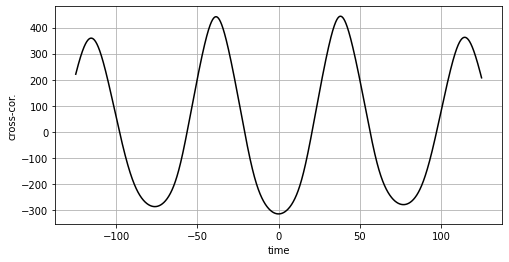

In [13]:
lags, cc = ccov(X0, X1, lmax=2500)
plt.figure(figsize=(8,4))
plt.plot(dt*lags, cc, '-k')
plt.xlabel("time")
plt.ylabel("cross-cor.")
plt.grid()
plt.show()

## The CPG model by Golubitsky & Buono

This model contains 8 Morris-Lecar cells, mutually coupled as shown in this scheme (from Buono and Golubitsky, J. Math. Biol. 42, 291–326, 2001):

<img src="img/Buono_connectivity.png" width=300>

To obtain the full range of quadruped (four-legged) gait patterns, they needed a minimum of 2 cells per limb, hence the 8-cell model. To derive the correct coupling parameters for the different gaits requires a robust knowledge of differential equations and group theory, therefore we cannot re-derive these in the limited space of this notebook.


[+] mode: walk


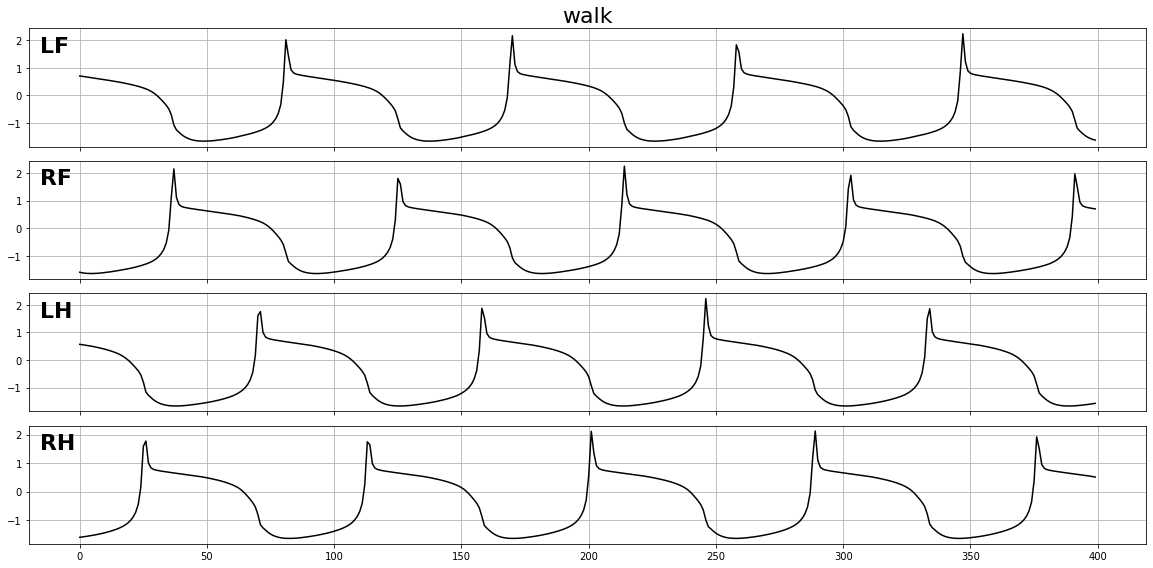

[+] Animate data as movie: cpg_quad_walk.mp4


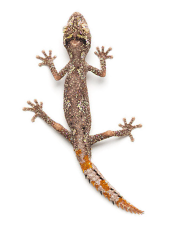

Animation created and saved.


In [5]:
from cpg_quad import *
data = ml8(n0=3000, mode="walk", doplot=True, doanimate=True)

### Cross-correlations

Try to re-construct the phase lag between the four legs from the cross-correlation curves - in which sequence do the legs activate?

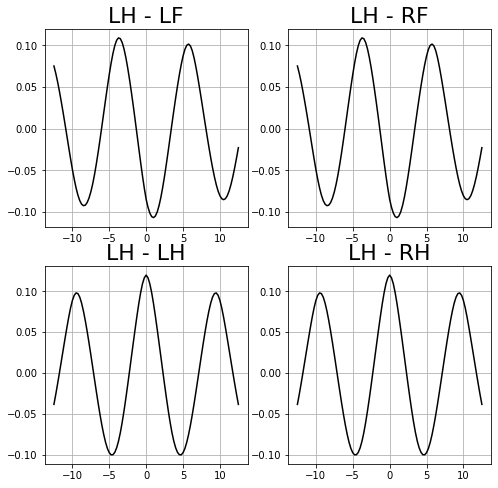

In [2]:
lmax = 50
lags, cc_LH_LH = ccov(data['LH'], data['LH'], lmax=lmax)
lags, cc_LH_RH = ccov(data['LH'], data['RH'], lmax=lmax)
lags, cc_LH_LF = ccov(data['LH'], data['LF'], lmax=lmax)
lags, cc_LH_RF = ccov(data['LH'], data['RF'], lmax=lmax)
dt2 = data['time'][1]-data['time'][0] # sampling interval of the interpolated time course

fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax[0,0].plot(dt2*lags, cc_LH_LF, '-k')
ax[0,0].set_title("LH - LF", fontsize=22)
ax[0,1].plot(dt2*lags, cc_LH_RF, '-k')
ax[0,1].set_title("LH - RF", fontsize=22)
ax[1,0].plot(dt2*lags, cc_LH_LH, '-k')
ax[1,0].set_title("LH - LH", fontsize=22)
ax[1,1].plot(dt2*lags, cc_LH_RH, '-k')
ax[1,1].set_title("LH - RH", fontsize=22)
for i in range(2):
    for j in range(2):
        ax[i,j].grid()
#plt.xlabel("time")
#plt.ylabel("cross-cor.")
#plt.grid()
plt.show()

### Quadruped locomotion

Here is a video animation of one of the gait types shown above:

<p align="center">
<video src="mov/cpg_quad2_walk.webm" width="256" height="256" controls preload></video>
</p>

from IPython.display import Video
Video("mov/cpg_quad2_walk.webm")